In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Load monthly mobile, desktop and cumulative files 

In [3]:
import json
  
# Opening JSON file
f = open('/content/data/dino_monthly_mobile_201507-202209.json')
mobile_access_modes_dict = json.load(f)

f = open('/content/data/dino_monthly_desktop_201507-202209.json')
desktop_access_modes_dict = json.load(f)

f = open('/content/data/dino_monthly_cumulative_201507-202209.json')
cumulative_access_modes_dict = json.load(f)

In [ ]:
with open(os.path.join("..","data","dino_monthly_mobile_201507-202209.json"), 'r') as openfile:
    # Reading from json file
    mobile_access_modes_dict = json.load(openfile)
    
with open(os.path.join("..","data","dino_monthly_desktop_201507-202209.json"), 'r') as openfile:
    # Reading from json file
    desktop_access_modes_dict = json.load(openfile)
    
with open(os.path.join("..","data","dino_monthly_cumulative_201507-202209.json"), 'r') as openfile:
    # Reading from json file
    cumulative_access_modes_dict = json.load(openfile)

In [ ]:
#cumulative_access_modes_dict

### Converting dictionaries to dataframes

In [5]:
mobile_access_time_series_json = []
for dino in mobile_access_modes_dict:
    for time_series_list in mobile_access_modes_dict[dino]:
        mobile_access_time_series_json.append(time_series_list)
        
desktop_access_time_series_json = []
for dino in desktop_access_modes_dict:
    for time_series_list in desktop_access_modes_dict[dino]:
        desktop_access_time_series_json.append(time_series_list)
        
cumulative_access_time_series_json = []
for dino in cumulative_access_modes_dict:
    for time_series_list in cumulative_access_modes_dict[dino]:
        cumulative_access_time_series_json.append(time_series_list)

mobile_time_series_df = pd.DataFrame.from_dict(mobile_access_time_series_json)
desktop_time_series_df = pd.DataFrame.from_dict(desktop_access_time_series_json)
cumulative_time_series_df = pd.DataFrame.from_dict(mobile_access_time_series_json)


In [6]:
mobile_time_series_df

,project,article,granularity,timestamp,agent,views
0,en.wikipedia,Coelosaurus_antiquus,monthly,2015070100,user,20
1,en.wikipedia,Coelosaurus_antiquus,monthly,2015080100,user,14
2,en.wikipedia,Coelosaurus_antiquus,monthly,2015090100,user,11
3,en.wikipedia,Coelosaurus_antiquus,monthly,2015100100,user,21
4,en.wikipedia,Coelosaurus_antiquus,monthly,2015110100,user,13
...,...,...,...,...,...,...
112692,en.wikipedia,Zuul,monthly,2022050100,user,1005
112693,en.wikipedia,Zuul,monthly,2022060100,user,937
112694,en.wikipedia,Zuul,monthly,2022070100,user,1526
112695,en.wikipedia,Zuul,monthly,2022080100,user,1233


##**ANALYSIS**

### 1) Maximum Average and Minimum Average

In [7]:
#Creating dataframes for dinosaur articles with highest and lowest average page requests for *MOBILE* and *DESKTOP* platforms

mobile_articles = mobile_time_series_df.groupby('article').mean().reset_index().sort_values("views",ascending=False)
mobile_articles_max_avg_dino = list(mobile_articles.article)[0]
mobile_articles_min_avg_dino = list(mobile_articles.article)[-1]

mobile_max_df = mobile_time_series_df[mobile_time_series_df["article"].isin([mobile_articles_max_avg_dino])]
mobile_max_df["access_type"]= f"Mobile max - {mobile_articles_max_avg_dino}"
mobile_min_df = mobile_time_series_df[mobile_time_series_df["article"].isin([mobile_articles_min_avg_dino])]
mobile_min_df["access_type"]= f"Mobile min - {mobile_articles_min_avg_dino}"

desktop_articles = desktop_time_series_df.groupby('article').mean().reset_index().sort_values("views",ascending=False)
desktop_articles_max_avg_dino = list(desktop_articles.article)[0]
desktop_articles_min_avg_dino = list(desktop_articles.article)[-1]
desktop_max_df = desktop_time_series_df[desktop_time_series_df["article"].isin([desktop_articles_max_avg_dino])]
desktop_max_df["access_type"] = f"Desktop max - {desktop_articles_max_avg_dino}"
desktop_min_df = desktop_time_series_df[desktop_time_series_df["article"].isin([desktop_articles_min_avg_dino])]
desktop_min_df["access_type"] = f"Desktop min - {desktop_articles_min_avg_dino}"

mobile_desktop_combined_min_max_df = pd.concat([mobile_max_df,mobile_min_df,desktop_max_df,desktop_min_df])
mobile_desktop_combined_min_max_df = mobile_desktop_combined_min_max_df[['timestamp','access_type','views']]
mobile_desktop_combined_min_max_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,timestamp,access_type,views
103272,2015070100,Mobile max - Tyrannosaurus,113592
103273,2015080100,Mobile max - Tyrannosaurus,61089
103274,2015090100,Mobile max - Tyrannosaurus,47233
103275,2015100100,Mobile max - Tyrannosaurus,63541
103276,2015110100,Mobile max - Tyrannosaurus,56612
...,...,...,...
45330,2022050100,Desktop min - Honghesaurus,349
45331,2022060100,Desktop min - Honghesaurus,82
45332,2022070100,Desktop min - Honghesaurus,44
45333,2022080100,Desktop min - Honghesaurus,83


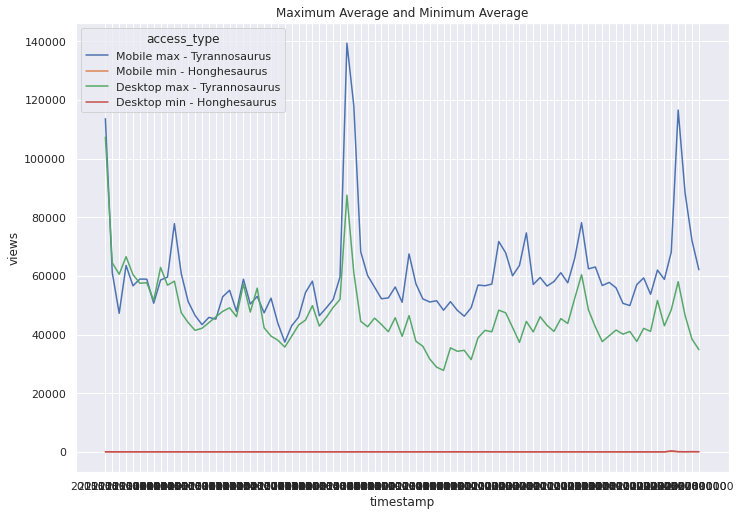

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot_for_averages = sns.lineplot(data=mobile_desktop_combined_min_max_df.reset_index(drop=True), 
                                x="timestamp", y="views", hue="access_type").set_title('Maximum Average and Minimum Average')
plot_for_averages = plot_for_averages.get_figure()

#plot_for_averages.savefig("/content/outputs/plot_for_averages.png")
plot_for_averages.savefig(os.path.join("..","results","plot_for_averages.png"))

### 2) Top 10 Peak Page Views

In [18]:
mobile_articles = list(mobile_time_series_df.groupby('article').max().reset_index().sort_values("views",ascending=False)[:10]["article"])
mobile_top_10_all_time_view_df = mobile_time_series_df[mobile_time_series_df["article"].isin(mobile_articles)]
mobile_top_10_all_time_view_df["access_type"] = "mobile"

desktop_articles = list(desktop_time_series_df.groupby('article').max().reset_index().sort_values("views",ascending=False)[:10]["article"])
desktop_top_10_all_time_view_df = desktop_time_series_df[desktop_time_series_df["article"].isin(desktop_articles)]
desktop_top_10_all_time_view_df["access_type"] = "desktop"

mobile_desktop_combined_top_10_view_df  = pd.concat([mobile_top_10_all_time_view_df,desktop_top_10_all_time_view_df])
mobile_desktop_combined_top_10_view_df = mobile_desktop_combined_top_10_view_df[['timestamp','access_type','views','article']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
mobile_desktop_combined_top_10_view_df

,timestamp,access_type,views,article
788,2015070100,mobile,464,Achelousaurus
789,2015080100,mobile,321,Achelousaurus
790,2015090100,mobile,301,Achelousaurus
791,2015100100,mobile,322,Achelousaurus
792,2015110100,mobile,325,Achelousaurus
...,...,...,...,...
105244,2022050100,desktop,25219,Velociraptor
105245,2022060100,desktop,31520,Velociraptor
105246,2022070100,desktop,20092,Velociraptor
105247,2022080100,desktop,16691,Velociraptor


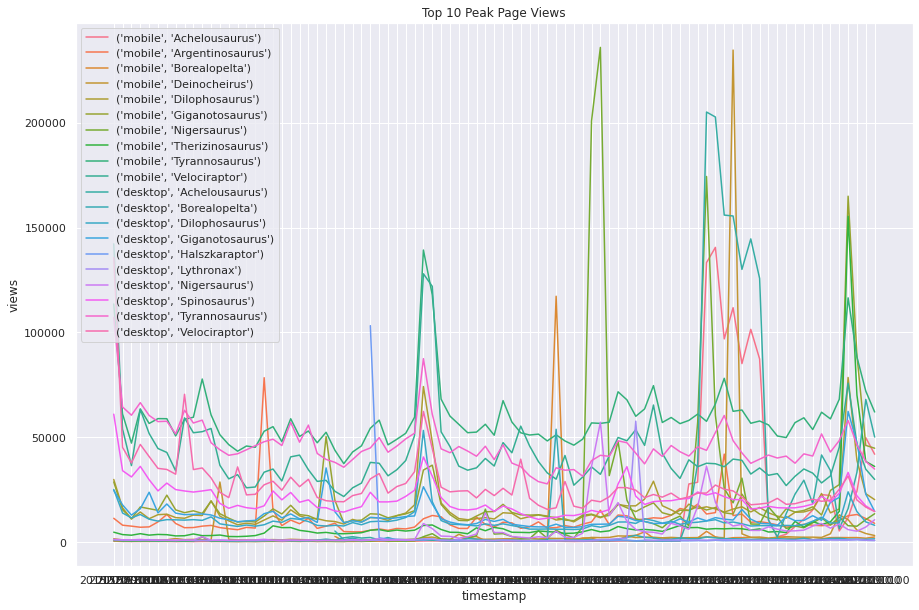

In [30]:
sns.set(rc={'figure.figsize':(15,10)})
plot_for_top_10_peak_views = sns.lineplot(data=mobile_desktop_combined_top_10_view_df.reset_index(drop=True), x="timestamp", y="views", 
                                hue=mobile_desktop_combined_top_10_view_df.reset_index(drop=True)[["access_type","article"]].apply(tuple, axis=1)).set_title('Top 10 Peak Page Views')
plot_for_top_10_peak_views = plot_for_top_10_peak_views.get_figure()

plot_for_top_10_peak_views.savefig("/content/outputs/plot_for_top_10_peak_views.png")
#plot_for_top_10_peak_views.savefig(os.path.join("..","results","plot_for_top_10_peak_views.png"))

### 3) Fewest Months of Data

In [31]:
mobile_articles = list(mobile_time_series_df.groupby('article').size().to_frame("months_cnt").reset_index().sort_values("months_cnt")[:10]["article"])
mobile_top_10_fewest_months_df = mobile_time_series_df[mobile_time_series_df["article"].isin(mobile_articles)]
mobile_top_10_fewest_months_df["access_type"] = "mobile"

desktop_articles = list(desktop_time_series_df.groupby('article').size().to_frame("months_cnt").reset_index().sort_values("months_cnt")[:10]["article"])
desktop_top_10_fewest_months_df = desktop_time_series_df[desktop_time_series_df["article"].isin(desktop_articles)]
desktop_top_10_fewest_months_df["access_type"] = "desktop"

mobile_desktop_combined_top_10_fewest_months_df  = pd.concat([mobile_top_10_fewest_months_df,desktop_top_10_fewest_months_df])
mobile_desktop_combined_top_10_fewest_months_df = mobile_desktop_combined_top_10_fewest_months_df[['timestamp','access_type','views','article']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [32]:
desktop_articles

['Elemgasem',
 'Tuebingosaurus',
 'Jakapil',
 'Mbiresaurus',
 'Perijasaurus',
 'Bisticeratops',
 'Iyuku',
 'Paralitherizinosaurus',
 'Bashanosaurus',
 'Dzharaonyx']

In [33]:
mobile_articles

['Elemgasem',
 'Tuebingosaurus',
 'Jakapil',
 'Mbiresaurus',
 'Perijasaurus',
 'Bisticeratops',
 'Iyuku',
 'Paralitherizinosaurus',
 'Bashanosaurus',
 'Dzharaonyx']

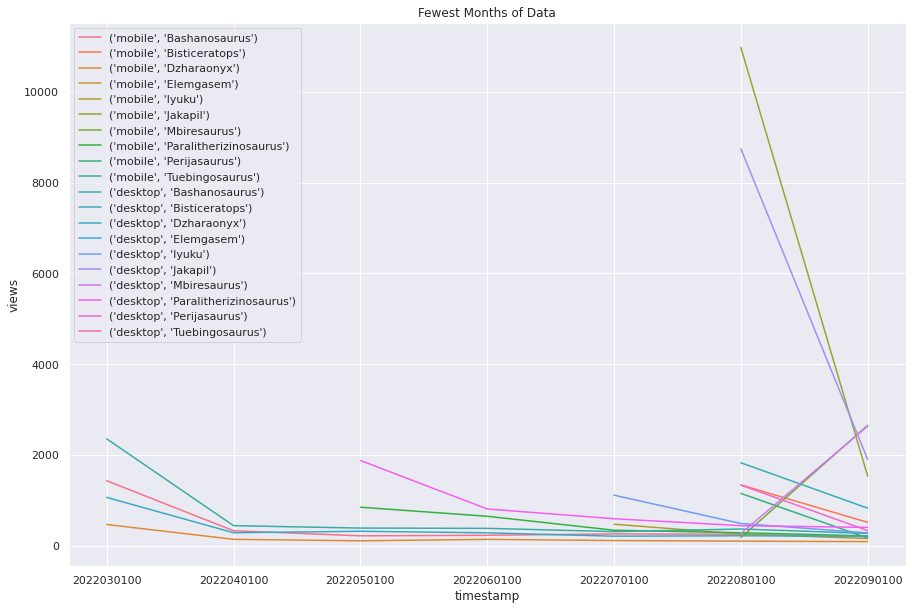

In [36]:
sns.set(rc={'figure.figsize':(15,10)})
plot_for_fewest_months_of_data = sns.lineplot(data=mobile_desktop_combined_top_10_fewest_months_df.reset_index(drop=True), x="timestamp", y="views", 
                                hue=mobile_desktop_combined_top_10_fewest_months_df[["access_type","article"]].reset_index(drop=True).apply(tuple, axis=1)).set_title('Fewest Months of Data')
plot_for_fewest_months_of_data = plot_for_fewest_months_of_data.get_figure()

plot_for_fewest_months_of_data.savefig("/content/outputs/plot_for_fewest_months_of_data.png")
#plot_for_fewest_months_of_data.savefig(os.path.join("..","results","plot_for_fewest_months_of_data.png"))